### Jane Shen, 20841468

In [1]:
# library imports
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1: Equiprobability Contour
### Question 1
#### Use the numpy.random.normal function to generate 5 samples each for the above two classes. Find the sample mean and covariance matrices for the two classes by hand.

In [2]:
# number of samples
N = 5

# class 1
np.random.seed(42)
C1_mean = np.array([4, 7])
C1_cov = np.array([[9, 3], [3, 10]])
C1_samples = np.random.multivariate_normal(C1_mean, C1_cov, N)

# class 2
np.random.seed(69)
C2_mean = np.array([5, 10])
C2_cov = np.array([[7, 0], [0, 16]])
C2_samples = np.random.multivariate_normal(C2_mean, C2_cov, N)

print("Class 1 samples:")
print(C1_samples)
print("\n")
print("Class 2 samples:")
print(C2_samples)

Class 1 samples:
[[ 3.13110325  5.4306818 ]
 [-0.43594269  7.75171025]
 [ 4.99001187  7.24810301]
 [-1.10306443  3.99339206]
 [ 4.02256344  9.15984298]]


Class 2 samples:
[[ 3.40317803 13.66202839]
 [ 3.4088448  14.64918067]
 [ 6.0522844   3.61005737]
 [ 7.79470475 14.8234617 ]
 [ 6.82395824 13.41017564]]


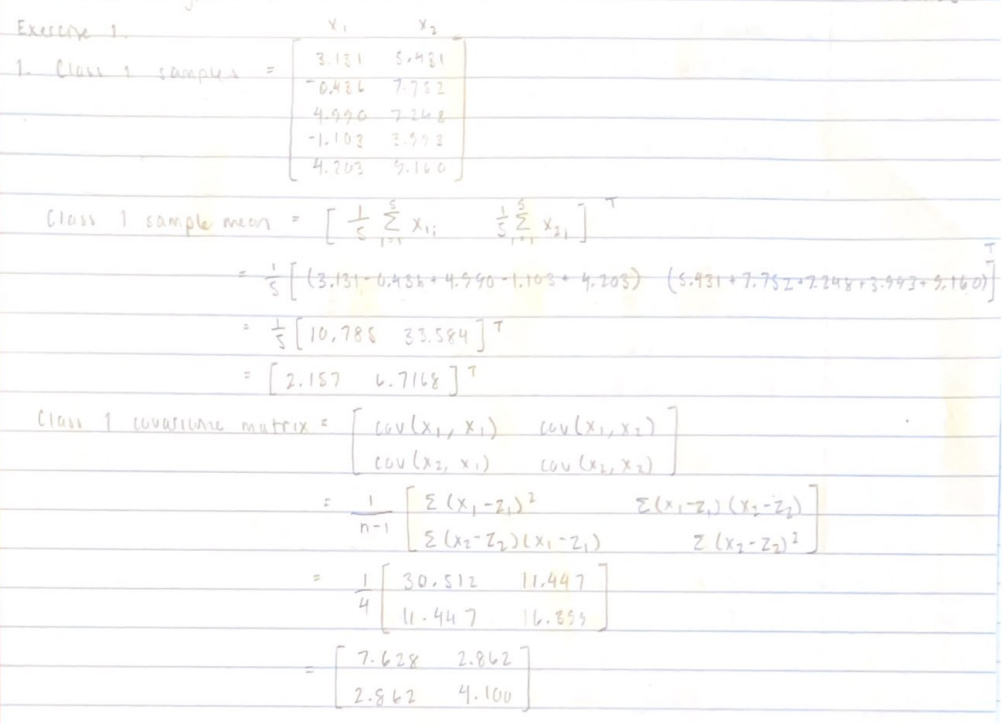

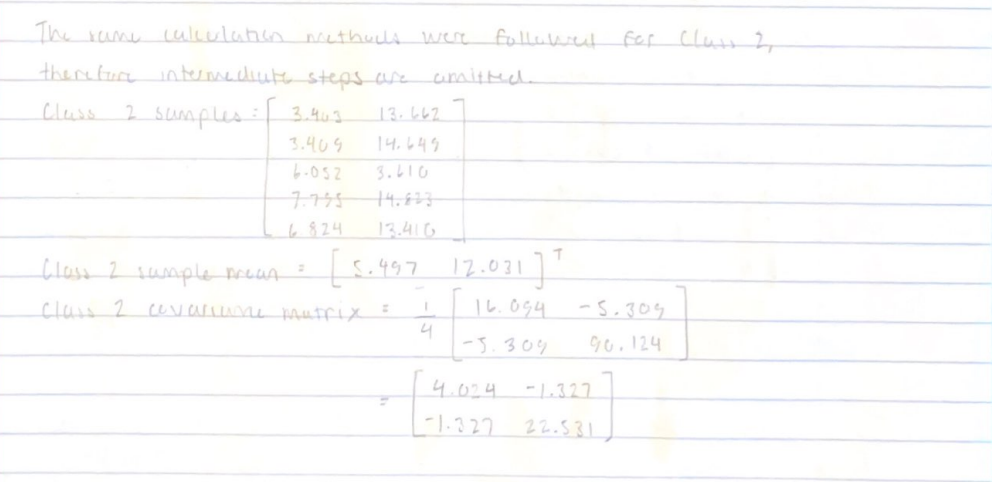

In [3]:
C1_sample_mean = np.array([2.157, 6.717])
C2_sample_mean = np.array([5.497, 12.031])

C1_sample_cov = np.array([[7.628, 2.862], [2.862, 4.100]])
C2_sample_cov = np.array([[4.024, -1.327], [-1.327, 22.531]])

print("Class 1 sample mean:")
print(C1_sample_mean)
print("\n")
print("Class 2 sample mean:")
print(C2_sample_mean)
print("\n")

print("Class 1 sample covariance matrix:")
print(C1_sample_cov)
print("\n")
print("Class 2 sample covariance matrix:")
print(C2_sample_cov)
print("\n")

Class 1 sample mean:
[2.157 6.717]


Class 2 sample mean:
[ 5.497 12.031]


Class 1 sample covariance matrix:
[[7.628 2.862]
 [2.862 4.1  ]]


Class 2 sample covariance matrix:
[[ 4.024 -1.327]
 [-1.327 22.531]]




### Question 2
#### Using the sample means and covariance matrices, find the eigenvalues and eigenvectors of the covariance matrices by hand.
#### Class 1

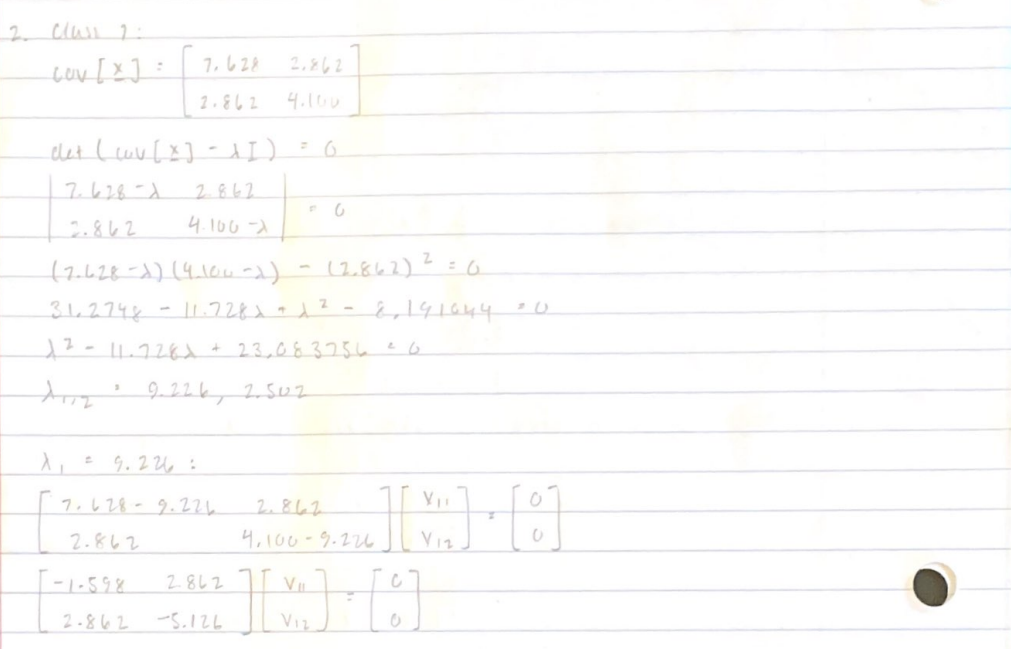

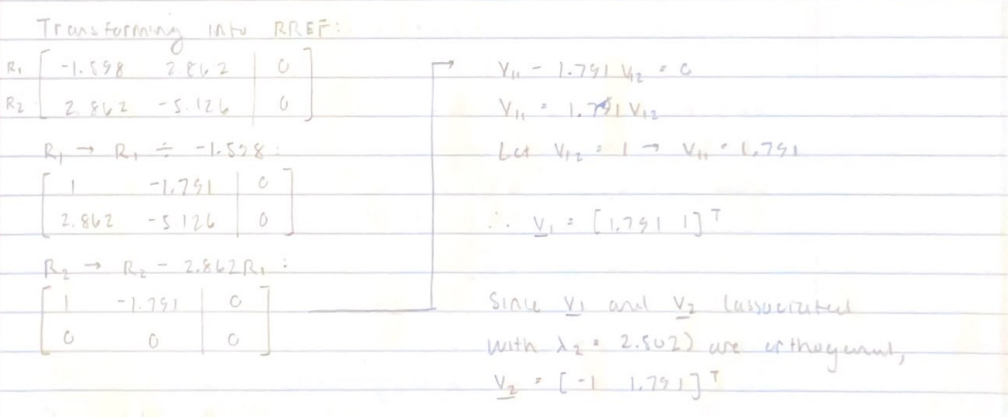

#### Class 2

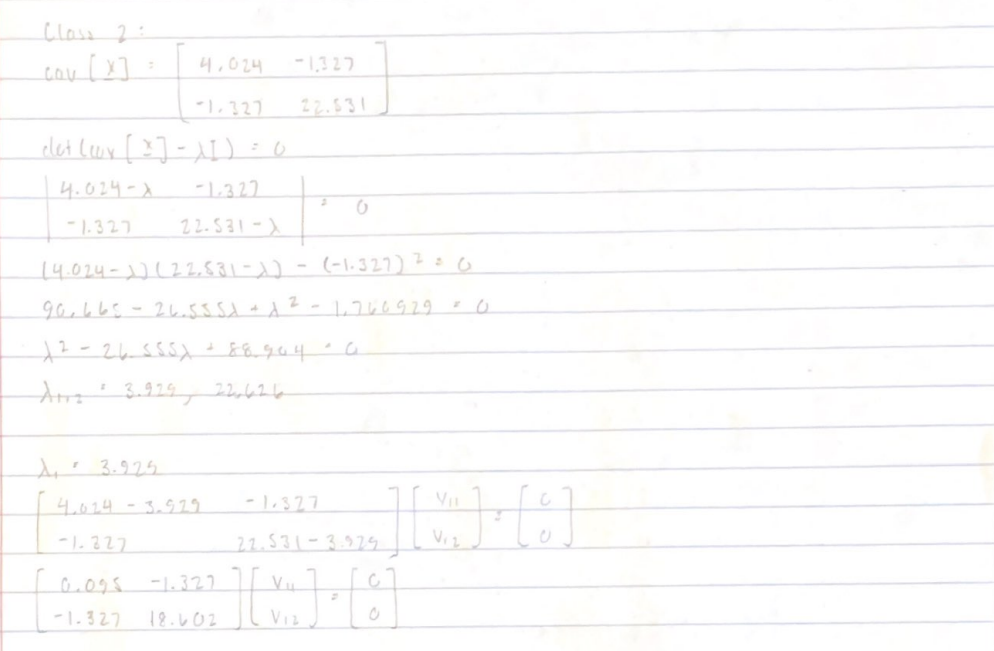

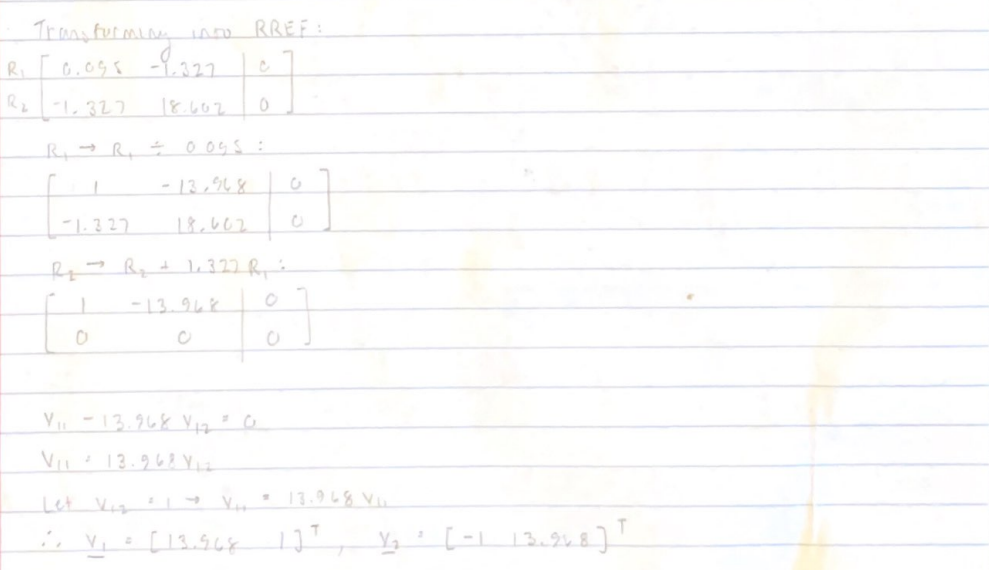

#### Printing hand-calculated results to summarize

In [4]:
# eigenvalues and eigenvectors of the sample covariance matrices
C1_eigenvalues = np.array([9.226, 2.502])
C1_eigenvectors = np.array([[1.791, 1], [-1, 1.791]])

print("Class 1 eigenvalues:")
print(C1_eigenvalues)
print("\n")
print("Class 1 eigenvectors:")
print(C1_eigenvectors)
print("\n")

C2_eigenvalues = np.array([3.929, 22.626])
C2_eigenvectors = np.array([[13.968, 1], [-1, 13.968]])

print("Class 2 eigenvalues:")
print(C2_eigenvalues)
print("\n")
print("Class 2 eigenvectors:")
print(C2_eigenvectors)
print("\n")

Class 1 eigenvalues:
[9.226 2.502]


Class 1 eigenvectors:
[[ 1.791  1.   ]
 [-1.     1.791]]


Class 2 eigenvalues:
[ 3.929 22.626]


Class 2 eigenvectors:
[[13.968  1.   ]
 [-1.    13.968]]




### Question 3
#### Using the above calculations, plot the equiprobability contours for the two classes in Python.
#### Class 1

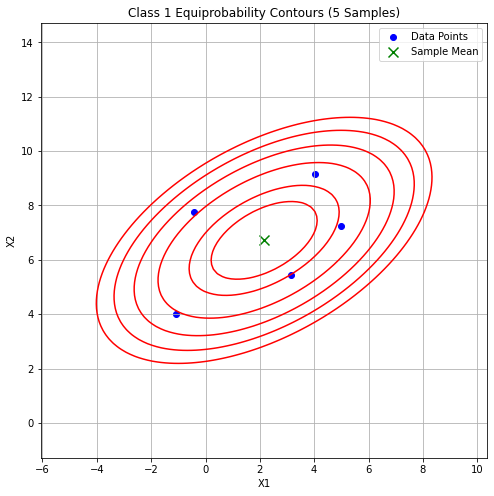

In [5]:
# confidence levels
C_values = [0.5, 1, 2, 3, 4, 5]

# create a figure
plt.figure(figsize=(8, 8))
ax = plt.gca()

# plot data points
plt.scatter(C1_samples[:,0], C1_samples[:,1], label='Data Points', color='blue')

# plot the equiprobability contours for different values of C
for C in C_values:
    # calculate the covariance inverse
    cov_inverse = np.linalg.inv(C1_sample_cov)

    # create a grid of points
    x, y = np.meshgrid(np.linspace(C1_sample_mean[0] - 8, C1_sample_mean[0] + 8, 100),
                       np.linspace(C1_sample_mean[1] - 8, C1_sample_mean[1] + 8, 100))

    # compute the Mahalanobis distance for each point on the grid
    dist = np.empty_like(x)
    for i in range(len(x)):
        for j in range(len(y)):
            point = np.array([x[i,j], y[i,j]])
            diff = point - C1_sample_mean
            dist[i,j] = np.dot(diff, np.dot(cov_inverse, diff))

    # plot the contour where distance equals C
    contour = plt.contour(x, y, dist, levels=[C], colors='red')

# plot sample mean and label
plt.scatter(C1_sample_mean[0], C1_sample_mean[1], color='green', marker='x', s=100, label='Sample Mean')

# Label the axes and add grid lines
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Class 1 Equiprobability Contours (5 Samples)')
plt.legend()
plt.grid()

# equal scaling for X and Y axes
plt.axis('equal')
plt.show()

#### Class 2

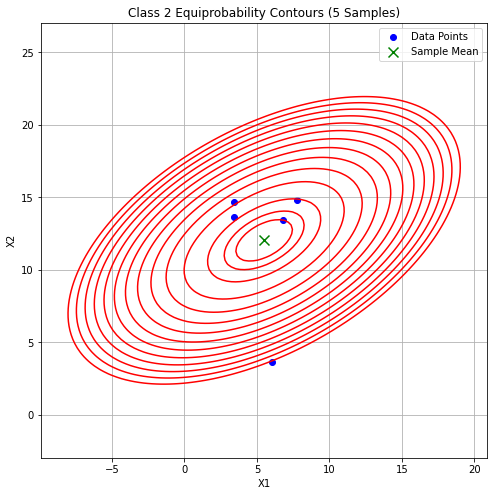

In [6]:
# confidence levels
C_values = [0.5, 1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]

# create a figure
plt.figure(figsize=(8, 8))
ax = plt.gca()

# plot data points
plt.scatter(C2_samples[:,0], C2_samples[:,1], label='Data Points', color='blue')

# plot the equiprobability contours for different values of C
for C in C_values:
    # calculate the covariance inverse
    cov_inverse = np.linalg.inv(C1_sample_cov)

    # create a grid of points
    x, y = np.meshgrid(np.linspace(C2_sample_mean[0] - 15, C2_sample_mean[0] + 15, 100),
                       np.linspace(C2_sample_mean[1] - 15, C2_sample_mean[1] + 15, 100))

    # compute the Mahalanobis distance for each point on the grid
    dist = np.empty_like(x)
    for i in range(len(x)):
        for j in range(len(y)):
            point = np.array([x[i,j], y[i,j]])
            diff = point - C2_sample_mean
            dist[i, j] = np.dot(diff, np.dot(cov_inverse, diff))

    # plot the contour where distance equals C
    contour = plt.contour(x, y, dist, levels=[C], colors='red')

# plot sample mean and label
plt.scatter(C2_sample_mean[0], C2_sample_mean[1], color='green', marker='x', s=100, label='Sample Mean')

# label the axes and add grid lines
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Class 2 Equiprobability Contours (5 Samples)')
plt.legend()
plt.grid()

# equal scaling for X and Y axes
plt.axis('equal')
plt.show()

### Question 4
#### Can you comment on how the contours relate to the original cluster samples?
The equiprobability contours provide insight into the distribution of data points within each class. In Class 1, all points are concentrated between contour levels C = 2 and C = 3. This suggests a low-variance distribution, which aligns with the sample covariance matrix of Class 1, where the covariances are relatively small. In Class 2, the data points are spread across a larger range of contour lines, with one point positioned on C = 24. This suggests that Class 2 exhibits higher variance, which aligns with the larger covariances seen in the sample covariance matrix of Class 2.

### Question 5
#### Let’s change the number of samples for the two classes to 100, and regenerate these samples using the numpy.random.normal function. Based on the new data, find the sample mean, sample covariance, eigenvalues, and eigenvectors using Python. Plot the equiprobability contours for the two classes. Is there a difference between the contours generated for 100 samples and 5 samples?
#### Class 1

In [7]:
# number of samples
N = 100

# class 1
np.random.seed(11)
C1_samples = np.random.multivariate_normal(C1_mean, C1_cov, N)
C1_sample_mean = np.array([np.mean(C1_samples[:,0]), np.mean(C1_samples[:,1])])

print(C1_sample_mean)

[3.96977697 7.02193249]


In [8]:
# class 1: var(x1, x1)
x1x1_sum = 0.0
for x1 in C1_samples[:,0]:
    x1x1_sum += (x1 - C1_sample_mean[0])**2

# class 1: var(x2, x2)
x2x2_sum = 0.0
x2_sample_mean = np.mean(C1_samples[:,1])
for x2 in C1_samples[:,1]:
    x2x2_sum += (x2 - C1_sample_mean[1])**2

# class 1: var(x1, x2)
x1x2_sum = 0.0
for x1, x2 in zip(C1_samples[:,0], C1_samples[:,1]):
    x1x2_sum += (x1 - C1_sample_mean[0])*(x2 - C1_sample_mean[1])
    
C1_sample_cov = np.array([[x1x1_sum/(N-1), x1x2_sum/(N-1)], [x1x2_sum/(N-1), x2x2_sum/(N-1)]])
print("Class 1 sample covariance matrix:")
print(C1_sample_cov)

Class 1 sample covariance matrix:
[[7.8664011  2.70908457]
 [2.70908457 9.21754565]]


In [9]:
# eigenvalues and eigenvectors of the sample covariance matrices
C1_eigenvalues, C1_eigenvectors = np.linalg.eig(C1_sample_cov)

print("Class 1 eigenvalues:")
print(C1_eigenvalues)
print("\n")

print("Class 1 eigenvectors:")
print(C1_eigenvectors)

Class 1 eigenvalues:
[ 5.74992447 11.33402228]


Class 1 eigenvectors:
[[-0.78802377 -0.61564482]
 [ 0.61564482 -0.78802377]]


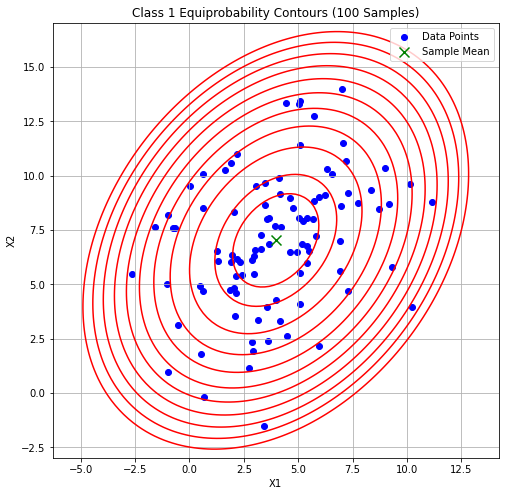

In [10]:
# confidence levels
C_values = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# create a figure
plt.figure(figsize=(8, 8))
ax = plt.gca()

# plot data points
plt.scatter(C1_samples[:,0], C1_samples[:,1], label='Data Points', color='blue')

# plot the equiprobability contours for different values of C
for C in C_values:
    # calculate the covariance inverse
    cov_inverse = np.linalg.inv(C1_sample_cov)

    # create a grid of points
    x, y = np.meshgrid(np.linspace(C1_sample_mean[0] - 10, C1_sample_mean[0] + 10, 100),
                       np.linspace(C1_sample_mean[1] - 10, C1_sample_mean[1] + 10, 100))

    # compute the Mahalanobis distance for each point on the grid
    dist = np.empty_like(x)
    for i in range(len(x)):
        for j in range(len(y)):
            point = np.array([x[i,j], y[i,j]])
            diff = point - C1_sample_mean
            dist[i,j] = np.dot(diff, np.dot(cov_inverse, diff))

    # plot the contour where distance equals C
    contour = plt.contour(x, y, dist, levels=[C], colors='red')

# plot sample mean and label
plt.scatter(C1_sample_mean[0], C1_sample_mean[1], color='green', marker='x', s=100, label='Sample Mean')

# Label the axes and add grid lines
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Class 1 Equiprobability Contours (100 Samples)')
plt.legend()
plt.grid()

# equal scaling for X and Y axes
plt.axis('equal')
plt.show()

#### Class 2

In [11]:
# class 2
np.random.seed(99)
C2_samples = np.random.multivariate_normal(C2_mean, C2_cov, N)
C2_sample_mean = np.array([np.mean(C2_samples[:,0]), np.mean(C2_samples[:,1])])

print(C2_sample_mean)

[5.27177048 9.74893793]


In [12]:
# class 2: var(x1, x1)
x1x1_sum = 0.0
for x1 in C2_samples[:,0]:
    x1x1_sum += (x1 - C2_sample_mean[0])**2

# class 2: var(x2, x2)
x2x2_sum = 0.0
for x2 in C2_samples[:,1]:
    x2x2_sum += (x2 - C2_sample_mean[1])**2

# class 2: var(x1, x2)
x1x2_sum = 0.0
for x1, x2 in zip(C2_samples[:,0], C2_samples[:,1]):
    x1x2_sum += (x1 - C2_sample_mean[0])*(x2 - C2_sample_mean[1])
        
C2_sample_cov = np.array([[x1x1_sum/(N-1), x1x2_sum/(N-1)], [x1x2_sum/(N-1), x2x2_sum/(N-1)]])
print("Class 2 sample covariance matrix:")
print(C2_sample_cov)

Class 2 sample covariance matrix:
[[ 6.37933444  0.93314648]
 [ 0.93314648 17.15643427]]


In [13]:
# eigenvalues and eigenvectors of the sample covariance matrices
C2_eigenvalues, C2_eigenvectors = np.linalg.eig(C2_sample_cov)

print("Class 2 eigenvalues:")
print(C2_eigenvalues)
print("\n")

print("Class 2 eigenvectors:")
print(C2_eigenvectors)

Class 2 eigenvalues:
[ 6.29913381 17.2366349 ]


Class 2 eigenvectors:
[[-0.99632694 -0.08563077]
 [ 0.08563077 -0.99632694]]


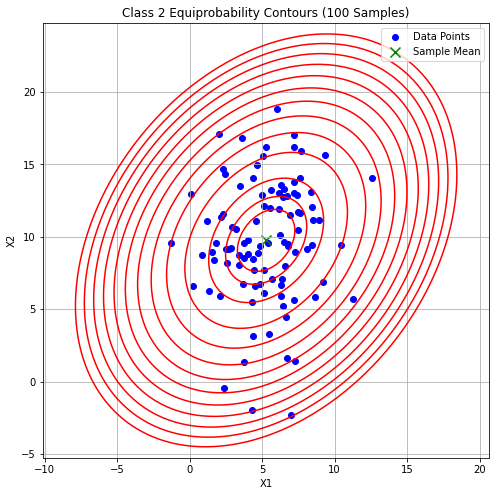

In [14]:
# confidence levels
C_values = [0.5, 1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]

# create a figure
plt.figure(figsize=(8, 8))
ax = plt.gca()

# plot data points
plt.scatter(C2_samples[:,0], C2_samples[:,1], label='Data Points', color='blue')

# plot the equiprobability contours for different values of C
for C in C_values:
    # calculate the covariance inverse
    cov_inverse = np.linalg.inv(C1_sample_cov)

    # create a grid of points
    x, y = np.meshgrid(np.linspace(C2_sample_mean[0] - 15, C2_sample_mean[0] + 15, 100),
                       np.linspace(C2_sample_mean[1] - 15, C2_sample_mean[1] + 15, 100))

    # compute the Mahalanobis distance for each point on the grid
    dist = np.empty_like(x)
    for i in range(len(x)):
        for j in range(len(y)):
            point = np.array([x[i,j], y[i,j]])
            diff = point - C2_sample_mean
            dist[i, j] = np.dot(diff, np.dot(cov_inverse, diff))

    # plot the contour where distance equals C
    contour = plt.contour(x, y, dist, levels=[C], colors='red')

# plot sample mean and label
plt.scatter(C2_sample_mean[0], C2_sample_mean[1], color='green', marker='x', s=100, label='Sample Mean')

# label the axes and add grid lines
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Class 2 Equiprobability Contours (100 Samples)')
plt.legend()
plt.grid()

# equal scaling for X and Y axes
plt.axis('equal')
plt.show()

There is a noticeable difference between the contours generated for 100 samples and 5 samples in both Class 1 and Class 2. With 100 samples, Class 1 exhibits a more evenly spread distribution across contours, while Class 2 appears more compact along the X1 axis and spans a wider range of contour levels. The increase in sample size has led to a more representative and refined depiction of the underlying data distribution.

## Exercise 2: MED Classifier

### Question 1
#### Let’s consider the 5 sample datasets that you generated for the two classes in the previous question. Find the decision boundary for the MED classifier by hand using the sample means and covariances. Plot the boundary and the data.

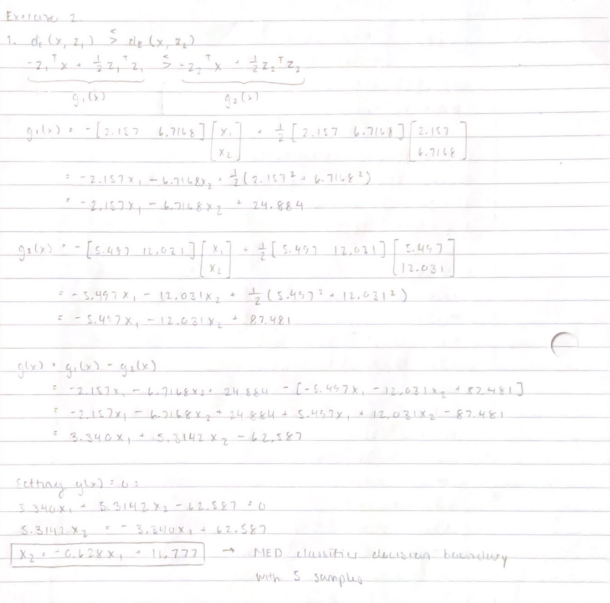

In [15]:
# number of samples
N = 5

# class 1
np.random.seed(42)
C1_mean = np.array([4, 7])
C1_cov = np.array([[9, 3], [3, 10]])
C1_samples = np.random.multivariate_normal(C1_mean, C1_cov, N)
C1_sample_mean = np.array([np.mean(C1_samples[:,0]), np.mean(C1_samples[:,1])])

# class 2
np.random.seed(69)
C2_mean = np.array([5, 10])
C2_cov = np.array([[7, 0], [0, 16]])
C2_samples = np.random.multivariate_normal(C2_mean, C2_cov, N)
C2_sample_mean = np.array([np.mean(C2_samples[:,0]), np.mean(C2_samples[:,1])])

print(C1_sample_mean)
print(C2_sample_mean)

[2.12093429 6.71674602]
[ 5.49659405 12.03098075]


In [16]:
C1_sample_cov = np.array([[7.450, 2.751], [2.751, 4.098]])
C2_sample_cov = np.array([[4.023, -1.328], [-1.328, 22.532]])

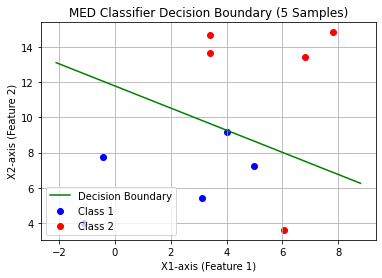

In [17]:
# setting range of x1 values
x1_values = np.linspace(min(C1_samples[:, 0].min(), C2_samples[:, 0].min()) - 1,
                        max(C1_samples[:, 0].max(), C2_samples[:, 0].max()) + 1, 100)

# calculate x2 values using the decision boundary equation
x2_values = -0.628*x1_values + 11.777

# plot data points for both classes
plt.scatter(C1_samples[:, 0], C1_samples[:, 1], label='Class 1', color='blue')
plt.scatter(C2_samples[:, 0], C2_samples[:, 1], label='Class 2', color='red')

# plot decision boundary
plt.plot(x1_values, x2_values, color='green', label='Decision Boundary')

plt.xlabel('X1-axis (Feature 1)')
plt.ylabel('X2-axis (Feature 2)')
plt.legend()
plt.grid()
plt.title('MED Classifier Decision Boundary (5 Samples)')
plt.show()

### Question 2
#### Now, let’s consider the 100 sample datasets for the two classes. Find the decision boundary for the MED classifier in Python using the sample means and covariances. Plot the boundary and the data.

In [18]:
# number of samples
N = 100

# class 1
np.random.seed(11)
C1_samples = np.random.multivariate_normal(C1_mean, C1_cov, N)
C1_sample_mean = np.array([np.mean(C1_samples[:,0]), np.mean(C1_samples[:,1])])

# class 2
np.random.seed(99)
C2_samples = np.random.multivariate_normal(C2_mean, C2_cov, N)
C2_sample_mean = np.array([np.mean(C2_samples[:,0]), np.mean(C2_samples[:,1])])

print(C1_sample_mean)
print(C2_sample_mean)

[3.96977697 7.02193249]
[5.27177048 9.74893793]


In [19]:
C1_sample_cov = np.array([[6.788, 1.682], [1.682, 8.125]])
C2_sample_cov = np.array([[5.316, -0.076], [-0.076, 15.985]])

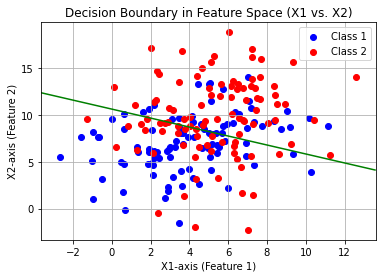

In [20]:
# define the range of x1 and x2 values
x1_values = np.linspace(min(C1_samples[:, 0].min(), C2_samples[:, 0].min()) - 1,
                        max(C1_samples[:, 0].max(), C2_samples[:, 0].max()) + 1, 100)
x2_values = np.linspace(min(C1_samples[:, 1].min(), C2_samples[:, 1].min()) - 1,
                        max(C1_samples[:, 1].max(), C2_samples[:, 1].max()) + 1, 100)

# create a grid of x1 and x2 values
x1_grid, x2_grid = np.meshgrid(x1_values, x2_values)

# flatten the grid to calculate y values for each point
x_flat = np.vstack([x1_grid.ravel(), x2_grid.ravel()]).T

# calculate the decision boundary (y values)
boundary_vector = C2_sample_mean - C1_sample_mean
y = np.dot(boundary_vector.T, x_flat.T) + 0.5 * (np.dot(C1_sample_mean, C1_sample_mean.T) - np.dot(C2_sample_mean, C2_sample_mean.T))

# reshape y values to match the grid shape
y_grid = y.reshape(x1_grid.shape)

# plot the data points for both classes
plt.scatter(C1_samples[:,0], C1_samples[:,1], label='Class 1', color='blue')
plt.scatter(C2_samples[:,0], C2_samples[:,1], label='Class 2', color='red')

# plot the decision boundary on the x1-x2 plane
plt.contour(x1_grid, x2_grid, y_grid, levels=[0], colors='green')

plt.xlabel('X1-axis (Feature 1)')
plt.ylabel('X2-axis (Feature 2)')
plt.legend()
plt.grid()
plt.title('Decision Boundary in Feature Space (X1 vs. X2)')
plt.show()

### Question 3
#### Generate 50 new samples per class for the two classes. Add some white noise to teach the 50 samples using numpy.random.normal with 0 mean and identity covariance matrix. Using the MED classifiers learned above, predict the labels for the 100 noisy samples generated for the two classes (50 samples per class). Report the classification accuracy.

In [24]:
# number of samples
N = 50 

# class 1
np.random.seed(22)
C1_test = np.random.multivariate_normal(C1_mean, C1_cov, N)

# class 2
np.random.seed(88)
C2_test = np.random.multivariate_normal(C2_mean, C2_cov, N)

# add white noise with mean 0 and identity covariance matrix
noise_mean = np.array([0, 0])
noise_cov = np.identity(2)
C1_noise = np.random.multivariate_normal(noise_mean, noise_cov, N)
C2_noise = np.random.multivariate_normal(noise_mean, noise_cov, N)

# add noise to the new samples
C1_noisy_samples = C1_test + C1_noise
C2_noisy_samples = C2_test + C2_noise

# combine noisy samples for both classes
noisy_samples = np.vstack((C1_noisy_samples, C2_noisy_samples))

# labels for the noisy samples (0 for class 1, 1 for class 2)
labels = np.concatenate((np.zeros(N), np.ones(N))).astype(int)

# empty list for MED predictions
predicted_labels = []

print(noisy_samples.shape)

(100, 2)


In [22]:
# 5 sample dataset
def classify(sample):
    x1, x2 = sample
    decision_boundary = -0.628*x1 + 11.777

    # Compare x2 to the decision boundary
    if x2 > decision_boundary:
        return 1
    else:
        return 0

# classify noisy samples
for sample in noisy_samples:
    predicted_labels.append(classify(sample))
    
# calculate classification accuracy
accuracy = np.mean(labels == predicted_labels)
print(f"Accuracy = {accuracy * 100:.2f}%")

Accuracy = 66.00%


In [25]:
# 100 sample dataset
# NOTE: must rerun the block 2 before this one prior to running this block
def classify(sample):
    boundary_vector = C2_sample_mean - C1_sample_mean
    y = np.dot(boundary_vector.T, sample) + 0.5 * (np.dot(C1_sample_mean, C1_sample_mean.T) - np.dot(C2_sample_mean, C2_sample_mean.T))
    
    if y > 0:
        return 1
    else:
        return 0

# classify noisy samples
for sample in noisy_samples:
    predicted_labels.append(classify(sample))
    
# calculate classification accuracy
accuracy = np.mean(labels == predicted_labels)
print(f"Accuracy = {accuracy * 100:.2f}%")

Accuracy = 69.00%


### Question 4
#### Which of the two classifiers is better, the one learned from 5 samples or the one with 100 samples? Why?
The classifier trained learned from 100 samples is better because the larger sample size is more likely to better represent the true distribution/distances of data in the population. This allows the model to generalize better to unseen data. A small sample size such as 5 puts the model at risk of overfitting, especially if one or more of the 5 samples happens to be an outlier.

## Exercise 3: Nearest Neighbour Classifier

### Question 1
#### Implement the k-nearest neighbor classifier using the dataset. Use Euclidean distance as the distance metric. Compute the kNN solution for each integer k from 1 to 5. Plot the classification boundaries between the two classes for the kNN classifier for each value of k between 1 and 5.

In [26]:
# number of samples
N = 100

# class 1
np.random.seed(11)
C1_samples = np.random.multivariate_normal(C1_mean, C1_cov, N)
C1_sample_mean = np.array([np.mean(C1_samples[:,0]), np.mean(C1_samples[:,1])])

# class 2
np.random.seed(99)
C2_samples = np.random.multivariate_normal(C2_mean, C2_cov, N)
C2_sample_mean = np.array([np.mean(C2_samples[:,0]), np.mean(C2_samples[:,1])])

# combine both classes of training samples
training_data = np.vstack((C1_samples, C2_samples))

# label training data (0: class 1; 1: class 2)
training_labels = np.concatenate((np.zeros(N), np.ones(N))).astype(int)

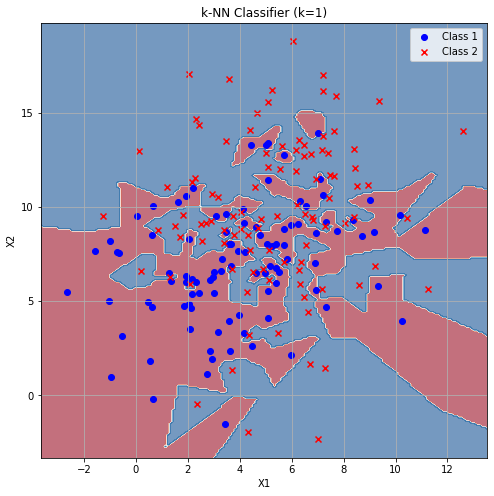

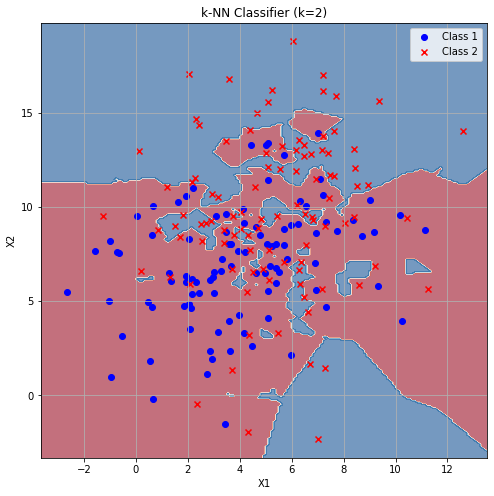

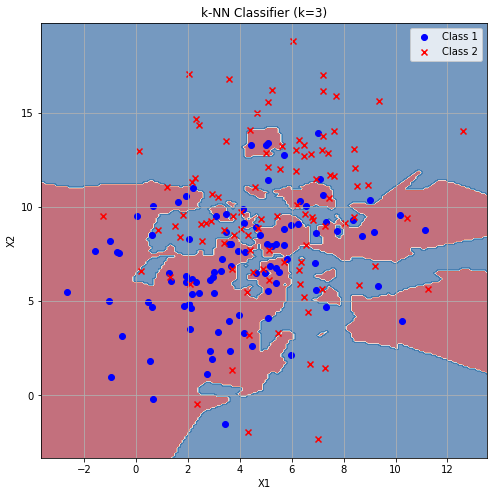

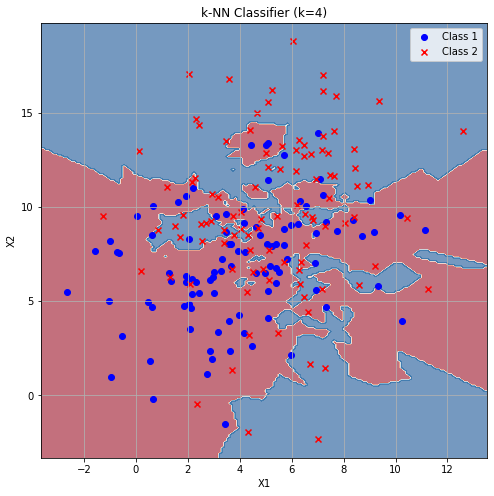

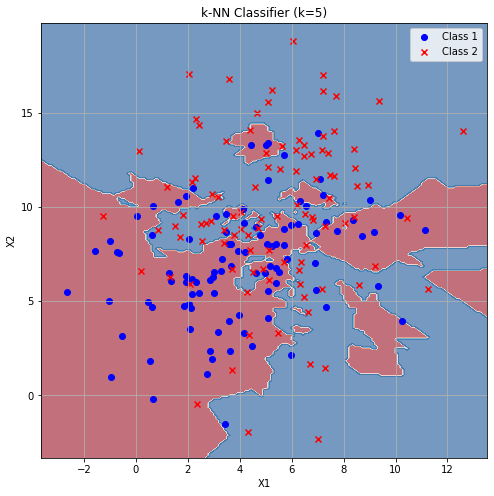

In [28]:
# number of nearest neighbors to consider (k)
k_values = [1, 2, 3, 4, 5]

# create a grid of points to visualize the classification boundaries
x1_min, x1_max = min(np.min(C1_samples[:,0]), np.min(C2_samples[:,0])) - 1, max(np.max(C1_samples[:,0]), np.max(C2_samples[:,0])) + 1
x2_min, x2_max = min(np.min(C1_samples[:,1]), np.min(C2_samples[:,1])) - 1, max(np.max(C1_samples[:,1]), np.max(C2_samples[:,1])) + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))

# iterate through each k value
for k in k_values:
    # create an empty array to store predictions
    predictions = np.zeros(xx1.shape)

    # loop through the grid and classify each point
    for i in range(xx1.shape[0]):
        for j in range(xx1.shape[1]):
            # calculate Euclidean distances between the current point and all data points
            distances = np.sqrt(np.sum((np.c_[xx1[i,j], xx2[i,j]] - np.vstack((C1_samples, C2_samples)))**2, axis=1))
            
            # sort distances and get indices of the k-nearest neighbors
            indices = np.argsort(distances)[:k]
            
            # get the class labels of the k-nearest neighbors
            neighbor_labels = np.concatenate(([0]*len(C1_samples), [1]*len(C2_samples)))[indices]
            
            # predict the class label based on majority vote
            predicted_label = np.argmax(np.bincount(neighbor_labels))
            
            # store the predicted label in the predictions array
            predictions[i,j] = predicted_label

    # plot the classification boundaries
    plt.figure(figsize=(8, 8))
    plt.contourf(xx1, xx2, predictions, cmap=plt.cm.RdBu, alpha=0.6)
    
    # plot class 1 and class 2 data points
    plt.scatter(C1_samples[:,0], C1_samples[:,1], label='Class 1', color='blue', marker='o')
    plt.scatter(C2_samples[:,0], C2_samples[:,1], label='Class 2', color='red', marker='x')
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'k-NN Classifier (k={k})')
    plt.legend()
    plt.grid()
    plt.show()

### Question 2

In [29]:
# number of samples
N = 50

# class 1
np.random.seed(22)
C1_test = np.random.multivariate_normal(C1_mean, C1_cov, N)

# class 2
np.random.seed(88)
C2_test = np.random.multivariate_normal(C2_mean, C2_cov, N)

# add white noise with mean 0 and identity covariance matrix
noise_mean = np.array([0, 0])
noise_cov = np.identity(2)
C1_noise = np.random.multivariate_normal(noise_mean, noise_cov, N)
C2_noise = np.random.multivariate_normal(noise_mean, noise_cov, N)

# add noise to test data
C1_noisy_samples = C1_test + C1_noise
C2_noisy_samples = C2_test + C2_noise

# combine both classes of test data
noisy_samples = np.vstack((C1_noisy_samples, C2_noisy_samples))

# label test data (0: class 1; 1: class 2)
testing_labels = np.concatenate((np.zeros(N), np.ones(N))).astype(int)

# empty list for KNN predictions
predicted_labels = []

print(noisy_samples.shape)

(100, 2)


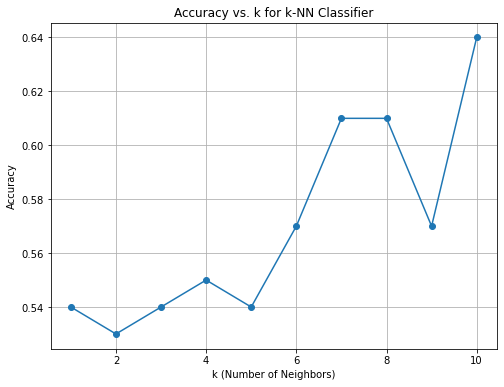

In [30]:
# number of nearest neighbors to consider (k)
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# empty list to store accuracy for each k
k_accuracy = []

for k in k_values:
    # empty array to store predictions for noisy data
    predictions = []
    
    # loop through each data point in the test dataset
    for sample in noisy_samples:
        # calculate Euclidean distances between the sample and all points in the training dataset
        distances = np.sqrt(np.sum((training_data - sample) ** 2, axis=1))
        
        # sort distances and get indices of the k-nearest neighbors
        indices = np.argsort(distances)[:k]
        
        # get the class labels of the k-nearest neighbors
        neighbor_labels = training_labels[indices]
        
        # predict the class label based on majority vote
        predicted_label = np.argmax(np.bincount(neighbor_labels))
        
        # append the predicted label to the predictions array
        predictions.append(predicted_label)
        
    # calculate classification accuracy
    accuracy = np.mean(testing_labels == predictions)
    k_accuracy.append(accuracy)
    
# plot accuracy vs k
plt.figure(figsize=(8, 6))
plt.plot(k_values, k_accuracy, marker='o', linestyle='-')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k for k-NN Classifier')
plt.grid()
plt.show()

In [31]:
print(k_accuracy)

[0.54, 0.53, 0.54, 0.55, 0.54, 0.57, 0.61, 0.61, 0.57, 0.64]


### Question 3
#### Which k value seems to be producing the best results? Why?
Initially, for k values between 1 and 5, there is no substantial difference in the results. This is likely due to the amount of overlap between the two classes. KNN is most effective when class boundaries are well-defined or exhibit a tendril-like structure. However, when k increases towards 10, one can see that it begins to perform better, however this may be a sign of overfitting.

### Question 4
#### How does the kNN classifier compare against the MED classifier in the previous exercise?
The kNN classifier performs slightly worse than the MED classifier from the previous exercise, achieving an accuracy range of 53-64% with k values ranging from 1-10. The MED classifier learned on 5 samples achieves 66% accuracy, while the MED classifier learned on 100 samples achieves 69% accuracy. This discrepency can be attributed to the differences in the nature of the two methods. MED relies on parametric assumptions and can perform well when data distribution aligns with these assumptions, while kNN is non-parametric and may struggle with complex or noisy data, leading to slightly lower accuracy.